C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



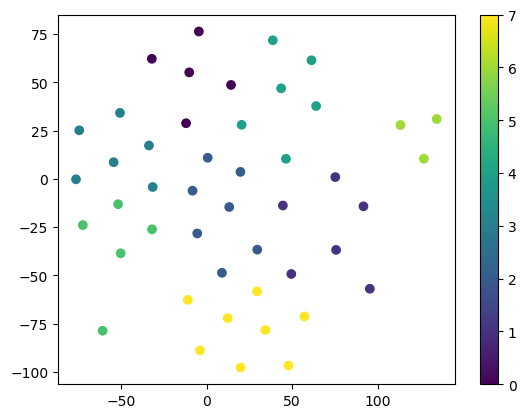

In [30]:
import pandas as pd
import nltk
from random import shuffle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.cluster import KMeans

data = pd.read_csv("cleanedData.csv")

data['courses'] = data[['code_module', 'code_presentation']].apply('-'.join, axis=1)
data = data.replace(' ', '_', regex=True)

# keep only relevant columns in our dataset
data = data[['courses', 'id_student','gender','region',
        'highest_education','imd_band', 'age_band',
        'studied_credits', 'final_result']]


tokenized_data = []
aaa_2013j = ' '
concatenatedAaa2013j = ' '
aaa_2014j = ' '
concatenatedAaa2014j = ' '
bbb_2013b = ' '
concatenatedBbb2013b = ' '
bbb_2013j = ' '
concatenatedBbb2013j = ' '
bbb_2014b = ' '
concatenatedBbb2014b = ' '
bbb_2014j = ' '
concatenatedBbb2014j = ' '
ccc_2014b = ' '
concatenatedCcc2014b = ' '
ccc_2014j = ' '
concatenatedCcc2014j = ' '
ddd_2013b = ' '
concatenatedDdd2013b = ' '
ddd_2013j = ' '
concatenatedDdd2013j = ' '
ddd_2014b = ' '
concatenatedDdd2014b = ' '
ddd_2014j = ' '
concatenatedDdd2014j = ' '
eee_2013j = ' '
concatenatedEee2013j = ' '
eee_2014b = ' '
concatenatedEee2014b = ' '
eee_2014j = ' '
concatenatedEee2014j = ' '
fff_2013b = ' '
concatenatedFff2013b = ' '
fff_2013j = ' '
concatenatedFff2013j = ' '
fff_2014b = ' '
concatenatedFff2014b = ' '
fff_2014j = ' '
concatenatedFff2014j = ' '
ggg_2013j = ' '
concatenatedGgg2013j = ' '
ggg_2014b = ' '
concatenatedGgg2014b = ' '
ggg_2014j = ' '
concatenatedGgg2014j = ' '
for i in data.index:
        if data['courses'][i] == 'AAA-2013J':
                aaa_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                aaa_2013j = aaa_2013j.lower()
                split = aaa_2013j.split()
                shuffle(split) 
                aaa_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedAaa2013j =' ' + aaa_2013j + concatenatedAaa2013j 
        elif data['courses'][i] == 'AAA-2014J':
                aaa_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                aaa_2014j = aaa_2014j.lower()
                split = aaa_2014j.split()
                shuffle(split)
                aaa_2014j = ' '.join(split) # Turn the list back into a string 
                concatenatedAaa2014j =' ' + aaa_2014j + concatenatedAaa2014j
        elif data['courses'][i] == 'BBB-2013B':
                bbb_2013b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                bbb_2013b = bbb_2013b.lower()
                split = bbb_2013b.split()
                shuffle(split)
                bbb_2013b = ' '.join(split) # Turn the list back into a string
                concatenatedBbb2013b =' ' + bbb_2013b + concatenatedBbb2013b
        elif data['courses'][i] == 'BBB-2013J':
                bbb_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                bbb_2013j = bbb_2013j.lower()
                split = bbb_2013j.split()
                shuffle(split)
                bbb_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedBbb2013j =' ' + bbb_2013j + concatenatedBbb2013j
        elif data['courses'][i] == 'BBB-2014B':
                bbb_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                bbb_2014b = bbb_2014b.lower()
                split = bbb_2014b.split()
                shuffle(split)
                bbb_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedBbb2014b =' ' + bbb_2014b + concatenatedBbb2014b
        elif data['courses'][i] == 'BBB-2014J':
                bbb_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                bbb_2014j = bbb_2014j.lower()
                split = bbb_2014j.split()
                shuffle(split)
                bbb_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedBbb2014j =' ' + bbb_2014j + concatenatedBbb2014j
        elif data['courses'][i] == 'CCC-2014B':
                ccc_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ccc_2014b = ccc_2014b.lower()
                split = ccc_2014b.split()
                shuffle(split)
                ccc_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedCcc2014b =' ' + ccc_2014b + concatenatedCcc2014b
        elif data['courses'][i] == 'CCC-2014J':
                ccc_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ccc_2014j = ccc_2014j.lower()
                split = ccc_2014j.split()
                shuffle(split)
                ccc_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedCcc2014j =' ' + ccc_2014j + concatenatedCcc2014j
        elif data['courses'][i] == 'DDD-2013B':
                ddd_2013b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ddd_2013b = ddd_2013b.lower()
                split = ddd_2013b.split()
                shuffle(split)
                ddd_2013b = ' '.join(split) # Turn the list back into a string
                concatenatedDdd2013b =' ' + ddd_2013b + concatenatedDdd2013b
        elif data['courses'][i] == 'DDD-2013J':
                ddd_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ddd_2013j = ddd_2013j.lower()
                split = ddd_2013j.split()
                shuffle(split)
                ddd_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedDdd2013j =' ' + ddd_2013j + concatenatedDdd2013j
        elif data['courses'][i] == 'DDD-2014B':
                ddd_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ddd_2014b = ddd_2014b.lower()
                split = ddd_2014b.split()
                shuffle(split)
                ddd_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedDdd2014b =' ' + ddd_2014b + concatenatedDdd2014b
        elif data['courses'][i] == 'DDD-2014J':
                ddd_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ddd_2014j = ddd_2014j.lower()
                split = ddd_2014j.split()
                shuffle(split)
                ddd_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedDdd2014j =' ' + ddd_2014j + concatenatedDdd2014j
        elif data['courses'][i] == 'EEE-2013J':
                eee_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                eee_2013j = eee_2013j.lower()
                split = eee_2013j.split()
                shuffle(split)
                eee_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedEee2013j =' ' + eee_2013j + concatenatedEee2013j                                                                           
        elif data['courses'][i] == 'EEE-2014B':
                eee_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                eee_2014b = eee_2014b.lower()
                split = eee_2014b.split()
                shuffle(split)
                eee_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedEee2014b =' ' + eee_2014b + concatenatedEee2014b
        elif data['courses'][i] == 'EEE-2014J':
                eee_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                eee_2014j = eee_2014j.lower()
                split = eee_2014j.split()
                shuffle(split)
                eee_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedEee2014j =' ' + eee_2014j + concatenatedEee2014j
        elif data['courses'][i] == 'FFF-2013B':
                fff_2013b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                fff_2013b = fff_2013b.lower()
                split = fff_2013b.split()
                shuffle(split)
                fff_2013b = ' '.join(split) # Turn the list back into a string
                concatenatedFff2013b =' ' + fff_2013b + concatenatedFff2013b
        elif data['courses'][i] == 'FFF-2013J':
                fff_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                fff_2013j = fff_2013j.lower()
                split = fff_2013j.split()
                shuffle(split)
                fff_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedFff2013j =' ' + fff_2013j + concatenatedFff2013j
        elif data['courses'][i] == 'FFF-2014B':
                fff_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                fff_2014b = fff_2014b.lower()
                split = fff_2014b.split()
                shuffle(split)
                fff_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedFff2014b =' ' + fff_2014b + concatenatedFff2014b
        elif data['courses'][i] == 'FFF-2014J':
                fff_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                fff_2014j = fff_2014j.lower()
                split = fff_2014j.split()
                shuffle(split)
                fff_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedFff2014j =' ' + fff_2014j + concatenatedFff2014j
        elif data['courses'][i] == 'GGG-2013J':
                ggg_2013j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ggg_2013j = ggg_2013j.lower()
                split = ggg_2013j.split()
                shuffle(split)
                ggg_2013j = ' '.join(split) # Turn the list back into a string
                concatenatedGgg2013j =' ' + ggg_2013j + concatenatedGgg2013j
        elif data['courses'][i] == 'GGG-2014B':
                ggg_2014b = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ggg_2014b = ggg_2014b.lower()
                split = ggg_2014b.split()
                shuffle(split)
                ggg_2014b = ' '.join(split) # Turn the list back into a string
                concatenatedGgg2014b =' ' + ggg_2014b + concatenatedGgg2014b
        elif data['courses'][i] == 'GGG-2014J':
                ggg_2014j = str(data['gender'][i] + ' ') + str(data['region'][i] + ' ') + str(data['highest_education'][i] + ' ') + str(data['imd_band'][i] + ' ') + str(data['age_band'][i] + ' ') + str(data['final_result'][i] + ' ')
                ggg_2014j = ggg_2014j.lower()
                split = ggg_2014j.split()
                shuffle(split)
                ggg_2014j = ' '.join(split) # Turn the list back into a string
                concatenatedGgg2014j =' ' + ggg_2014j + concatenatedGgg2014j
                                                                                
tokenized_data.append(nltk.word_tokenize(concatenatedAaa2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedAaa2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedBbb2013b))
tokenized_data.append(nltk.word_tokenize(concatenatedBbb2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedBbb2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedBbb2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedCcc2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedCcc2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedDdd2013b))
tokenized_data.append(nltk.word_tokenize(concatenatedDdd2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedDdd2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedDdd2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedEee2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedEee2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedEee2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedFff2013b))
tokenized_data.append(nltk.word_tokenize(concatenatedFff2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedFff2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedFff2014j))
tokenized_data.append(nltk.word_tokenize(concatenatedGgg2013j))
tokenized_data.append(nltk.word_tokenize(concatenatedGgg2014b))
tokenized_data.append(nltk.word_tokenize(concatenatedGgg2014j))




             

# training the W2V model
model = Word2Vec(sentences=tokenized_data, 
                 window=6,  
                 workers=4)


def reduce_dimensions(model):
    num_components = 2 # number of dimensions to keep after compression
    # extract vocabulary from model and vectors in order to associate them in t
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    # apply TSNE
    tsne = TSNE(n_components=num_components, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_embeddings(x_vals, y_vals, labels):
 
    fig = go.Figure()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', text=labels)
    fig.add_trace(trace)
    fig.update_layout(title="Word2Vec - Visualizzazione embedding con TSNE")
    fig.show()
    return fig

x_vals, y_vals, labels = reduce_dimensions(model)
plot = plot_embeddings(x_vals, y_vals, labels)

def run_tsne(data, num_dimensions=2, perplexity=30.0, learning_rate=200.0, num_iterations=1000):
        # Create t-SNE object
        tsne = TSNE(n_components=num_dimensions, perplexity=perplexity, learning_rate=learning_rate, n_iter=num_iterations)

        # Run t-SNE on the data
        embedded_data = tsne.fit_transform(data)
    
        return embedded_data


def plot_tsne(embedded_data):
        # Create a scatter plot of the embedded data
        plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
        plt.colorbar()
        plt.show()




# Generate random data
data = np.asarray(model.wv.vectors)

# Run t-SNE
embedded_data = run_tsne(data)





kmeans = KMeans()  
kmeans.fit(embedded_data)


cluster_labels = kmeans.labels_


plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()
  
  



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



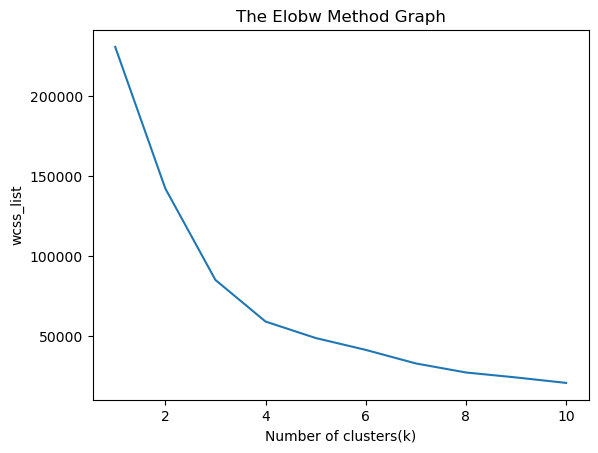

In [31]:
wcss_list = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(embedded_data)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

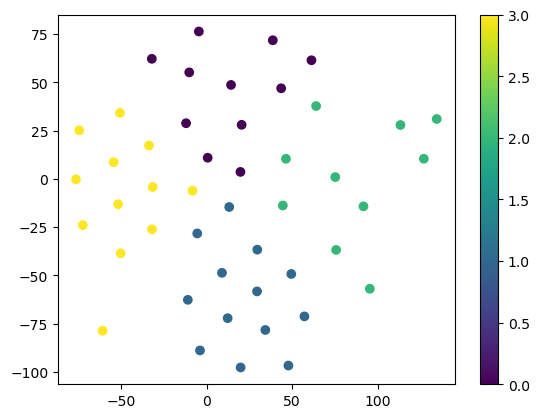

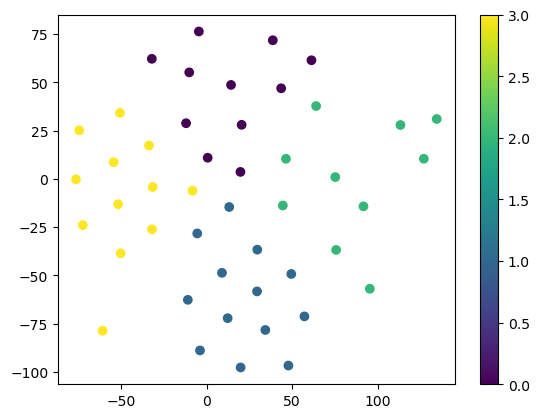

In [33]:
import mpld3
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(embedded_data)


cluster_labels = kmeans.labels_


plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()

fig, ax = plt.subplots()
scatter = ax.scatter(embedded_data[:, 0], embedded_data[:, 1],  c=cluster_labels)
cbar = plt.colorbar(scatter)

# Convert the plot to an interactive HTML format
html_graph = mpld3.fig_to_html(fig)
    
with open('kmeans.html', 'w') as file:
    file.write(html_graph)
  